###This analysis will include Apple, Google, Microsoft, and Amazon stocks. It will look at:
* moving averages
* daily returns
* pearsonr values
* correlations between daily prices
* correlations between closing prices
* which stock gives highest Expected Return, with lowest Risk

In [10]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from pandas.io.data import DataReader
from datetime import datetime


In [11]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [12]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [13]:
for stock in tech_list: 
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [16]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,117.053611,118.046905,115.927183,116.958175,5.322626e+07,115.787695
std,11.160845,11.111964,11.073685,11.087502,2.152360e+07,11.434391
min,95.550003,96.879997,95.180000,95.970001,1.447960e+07,94.356997
25%,107.967500,108.925001,106.620003,107.937500,3.844292e+07,106.344981
50%,118.680001,119.914997,117.720001,118.930000,4.826135e+07,117.704435
75%,127.142502,127.907497,125.982502,126.912502,6.209938e+07,126.029532
max,134.460007,134.539993,131.399994,133.000000,1.898463e+08,131.942761


In [17]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2014-08-12 to 2015-08-11
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


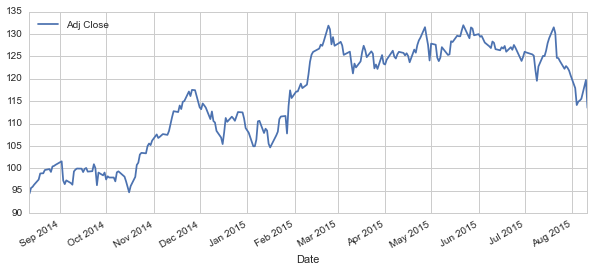

In [18]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

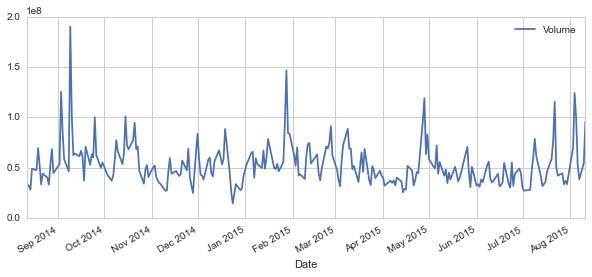

In [19]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [21]:
ma_day = [10, 20, 50]

for ma in ma_day: 
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)

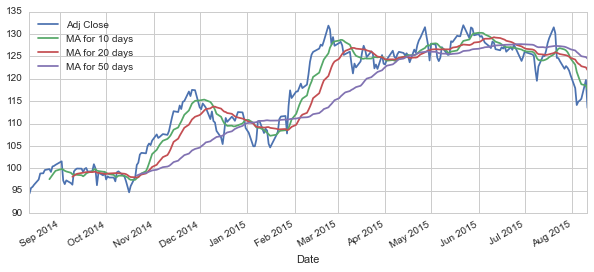

In [23]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))

###The moving average for Apple stock over one year

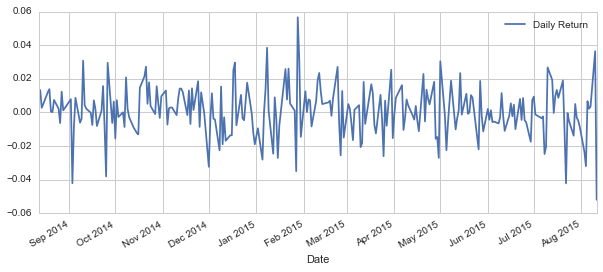

In [24]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(legend=True, figsize=(10,4))

###Daily return for Apple stock

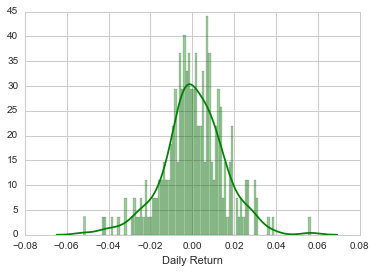

In [25]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color = 'green')

###The daily returns for Apple stock over one year

In [26]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [27]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-08-12,94.356997,319.320007,562.732562,42.399538
2014-08-13,95.605649,326.279999,574.782639,42.945121
2014-08-14,95.861281,333.209991,574.652643,43.130228
2014-08-15,96.333216,333.630005,573.482564,43.636841
2014-08-18,97.493384,334.529999,582.162619,43.948602


In [28]:
tech_rets = closing_df.pct_change()

In [29]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-08-12,NaN,NaN,NaN,NaN
2014-08-13,0.013233,0.021796,0.021414,0.012868
2014-08-14,0.002674,0.021239,-0.000226,0.004310
2014-08-15,0.004923,0.001261,-0.002036,0.011746
2014-08-18,0.012043,0.002698,0.015136,0.007144


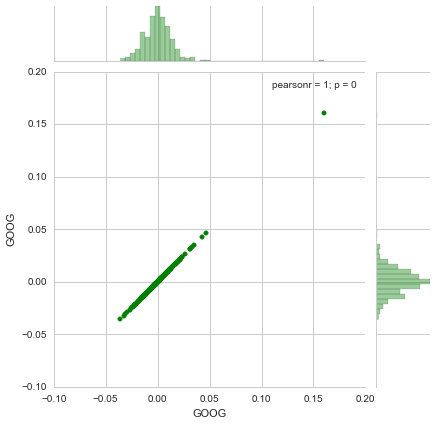

In [30]:
sns.jointplot ('GOOG', 'GOOG', tech_rets, kind = 'scatter', color = 'green')

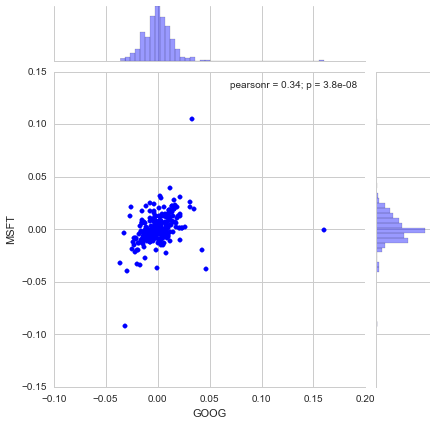

In [31]:
sns.jointplot ('GOOG', 'MSFT', tech_rets, kind = 'scatter', color = 'blue')

###The pearsonr value can give you a sense of how correlated the daily percentage returns are to one another

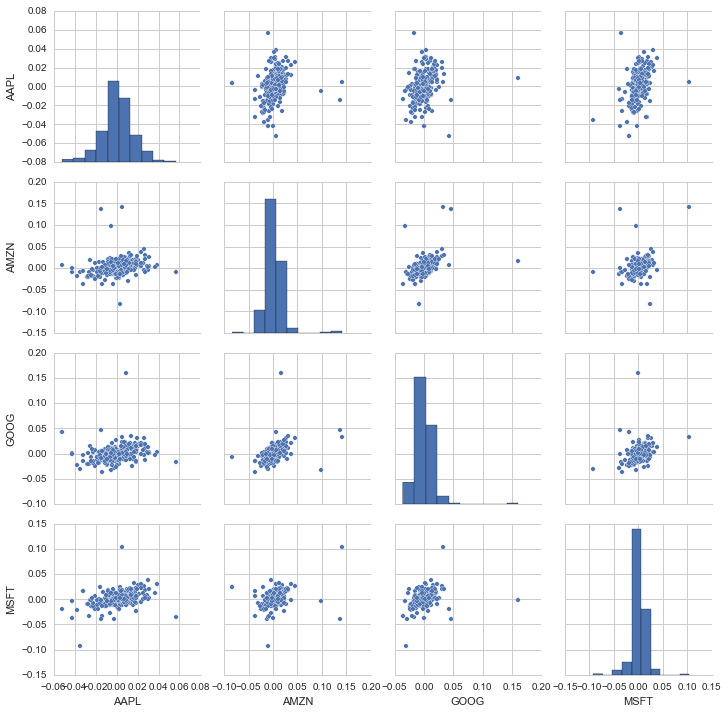

In [33]:
sns.pairplot(tech_rets.dropna())

###Looks like there may be a relationship between Google and Amazon...let's investigate

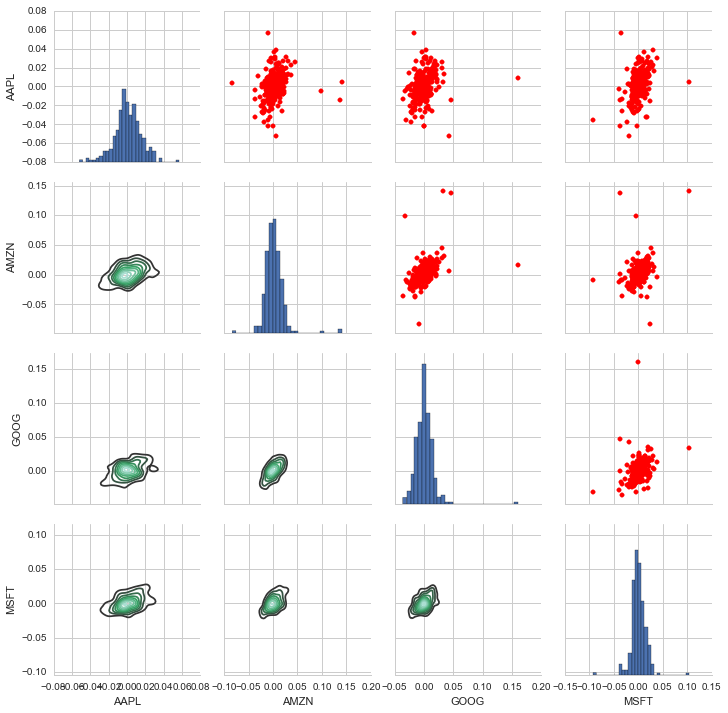

In [35]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color = 'red')
returns_fig.map_lower(sns.kdeplot)
returns_fig.map_diag(plt.hist, bins=30)

###Correlations between daily prices

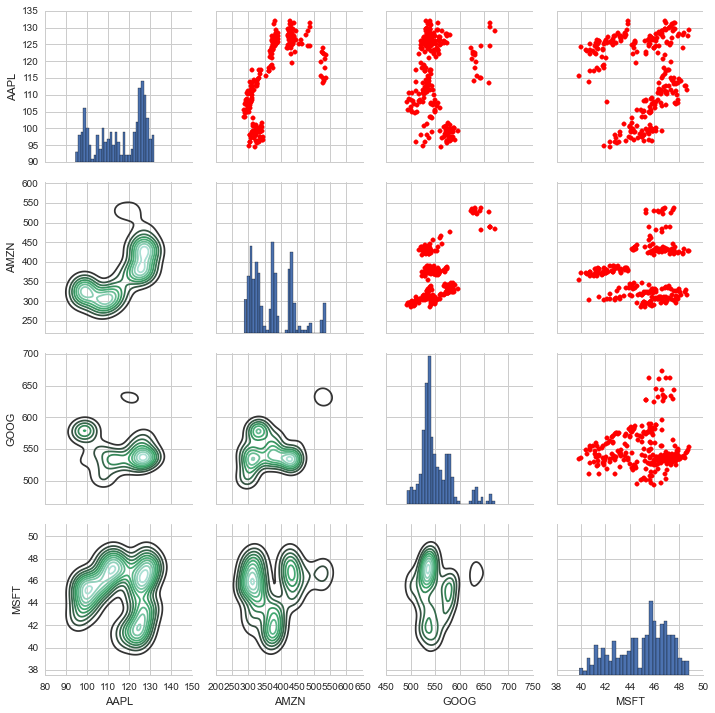

In [36]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter, color = 'red')
returns_fig.map_lower(sns.kdeplot)
returns_fig.map_diag(plt.hist, bins=30)

###Correlations between closing prices. Looks like there's a correlation between Apple and Microsoft. 

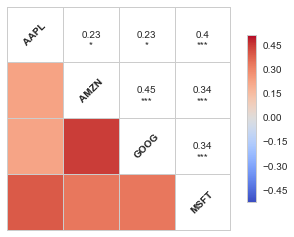

In [39]:
sns.corrplot(tech_rets.dropna(), annot= True)

###Amazon and Google daily prices are most correlated at 0.45, which we visually estimated above.

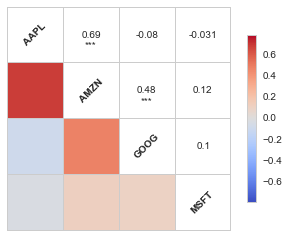

In [38]:
sns.corrplot(closing_df, annot= True)

###Apple and Microsoft closing prices are most correlated at 0.69, which we visually estimated above.

In [41]:
rets = tech_rets.dropna()

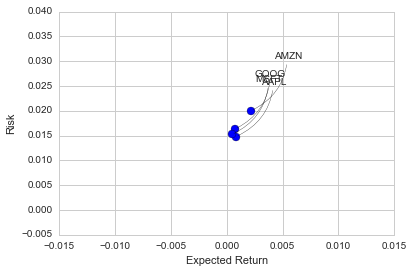

In [47]:
area = np.pi*20
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

###The best stock would give you high Expected Returns with the lowest Risk. 